In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
import warnings

warnings.filterwarnings('ignore')

In [79]:
data = 'SaYoPillow.csv'

df = pd.read_csv(data)

In [80]:
df.shape

(630, 6)

In [81]:
df.head()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level
0,91.840,16.600,89.840,1.840,74.20,3
1,91.552,15.880,89.552,1.552,72.76,3
2,96.000,10.000,95.000,7.000,60.00,1
3,90.768,13.920,88.768,0.768,68.84,3
4,97.872,6.496,96.248,8.248,53.12,0


In [82]:
df.isnull().values.sum()

0

In [83]:
df.duplicated().sum()

0

In [84]:
df.dtypes

body_temperature    float64
limb_movement       float64
Blood_oxygen        float64
Sleeping_hours      float64
Heart_rate          float64
Stress_level          int64
dtype: object

In [85]:
df.describe()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level
count,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,92.80000,11.700000,90.900000,3.700000,64.500000,2.000000
std,3.52969,4.299629,3.902483,3.054572,9.915277,1.415337
min,85.00000,4.000000,82.000000,0.000000,50.000000,0.000000
25%,90.50000,8.500000,88.500000,0.500000,56.250000,1.000000
50%,93.00000,11.000000,91.000000,3.500000,62.500000,2.000000
75%,95.50000,15.750000,94.250000,6.500000,72.500000,3.000000
max,99.00000,19.000000,97.000000,9.000000,85.000000,4.000000


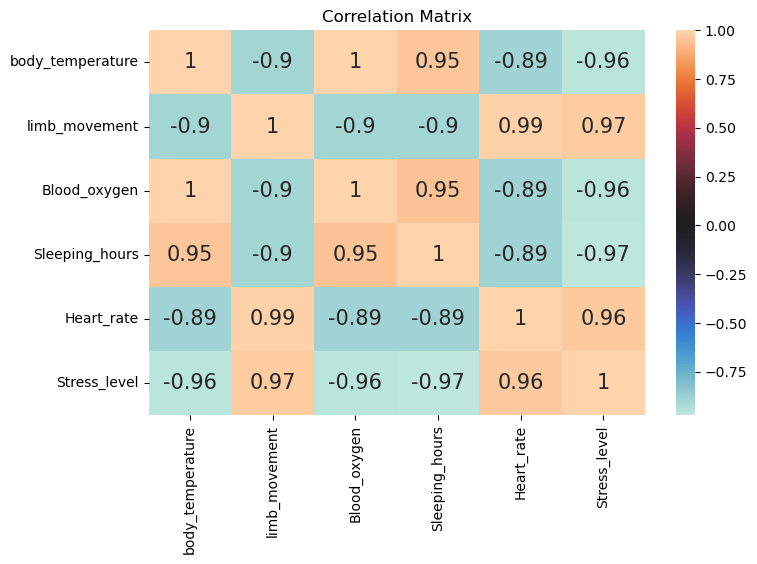

In [86]:
fig, ax = plt.subplots(figsize=(8,5))
cols=["body_temperature", "limb_movement","Blood_oxygen","Sleeping_hours", "Heart_rate", "Stress_level"]
sns.heatmap(df[cols].corr(), cmap="icefire", annot=True, annot_kws={'size': 15})
plt.title("Correlation Matrix")
plt.show()

In [87]:
##--Stress Levels and Sleeping Hours are strongly negatively correlated. The more people sleep, the less they are likely to be stressed
##Body temperature and stress level are highly negatively correlated

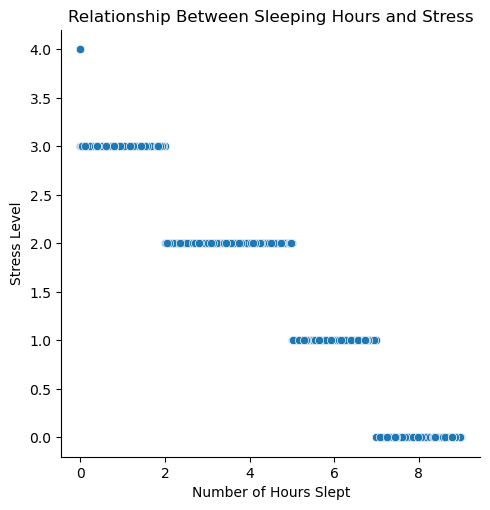

In [88]:
sns.relplot(x="Sleeping_hours", y="Stress_level", data=df, kind="scatter")
plt.xlabel("Number of Hours Slept")
plt.ylabel("Stress Level")
plt.title("Relationship Between Sleeping Hours and Stress")
plt.show()


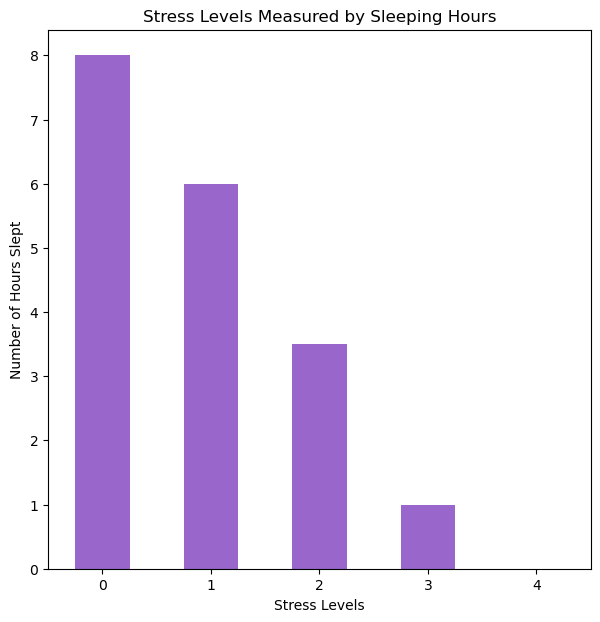

In [89]:
fig, ax = plt.subplots(figsize=(7,7))
df.groupby(df["Stress_level"])["Sleeping_hours"].mean().plot(kind='bar', rot=0, color='#9966cc')
plt.title("Stress Levels Measured by Sleeping Hours")
plt.xlabel("Stress Levels")
plt.ylabel("Number of Hours Slept")
plt.show()

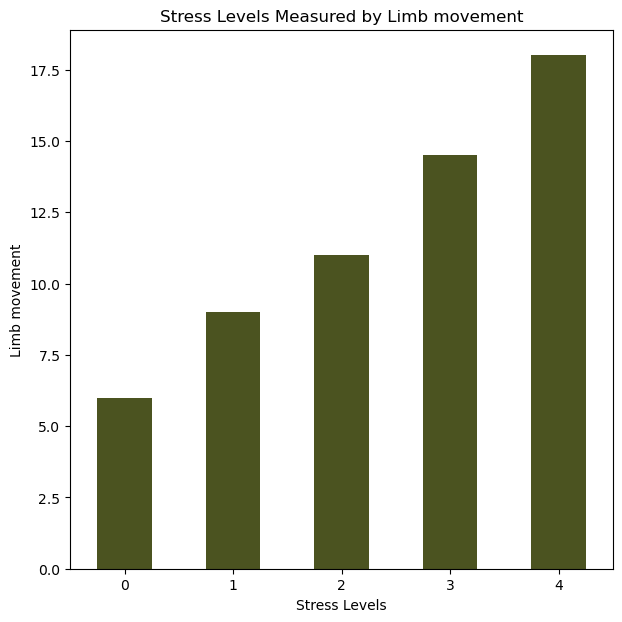

In [90]:
fig, ax = plt.subplots(figsize=(7,7))
df.groupby(df["Stress_level"])["limb_movement"].mean().plot(kind='bar', rot=0, color='#4b5320')
plt.title("Stress Levels Measured by Limb movement")
plt.xlabel("Stress Levels")
plt.ylabel("Limb movement")
plt.show()

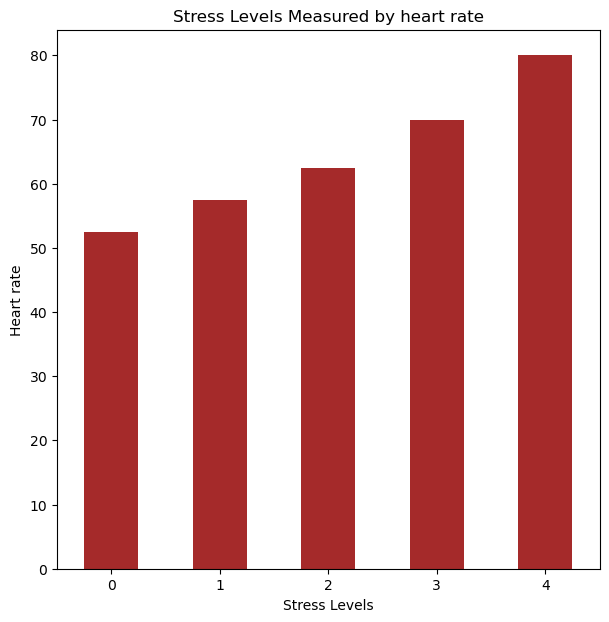

In [91]:
fig, ax = plt.subplots(figsize=(7,7))
df.groupby(df["Stress_level"])["Heart_rate"].mean().plot(kind='bar', rot=0, color='#a52a2a')
plt.title("Stress Levels Measured by heart rate")
plt.xlabel("Stress Levels")
plt.ylabel("Heart rate")
plt.show()

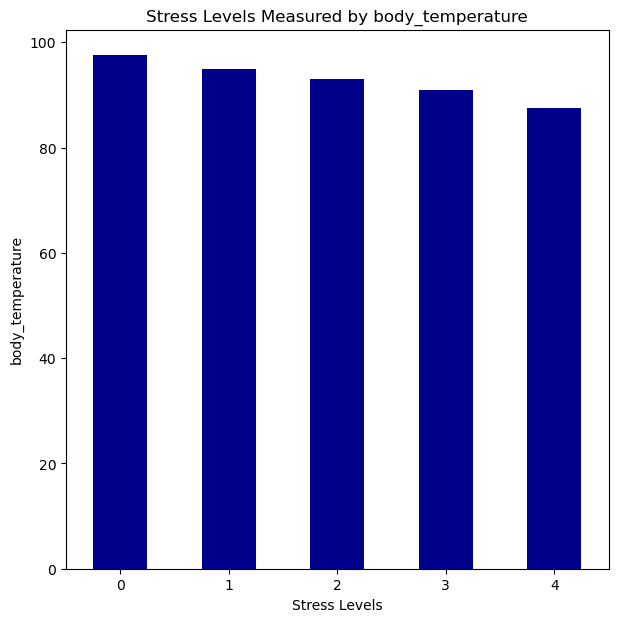

In [92]:
fig, ax = plt.subplots(figsize=(7,7))
df.groupby(df["Stress_level"])["body_temperature"].mean().plot(kind='bar', rot=0, color='#00008b')
plt.title("Stress Levels Measured by body_temperature")
plt.xlabel("Stress Levels")
plt.ylabel("body_temperature")
plt.show()

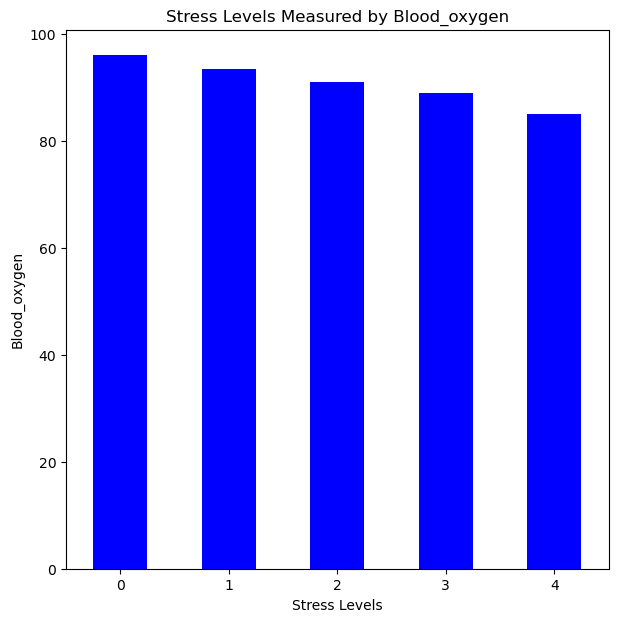

In [93]:
fig, ax = plt.subplots(figsize=(7,7))
df.groupby(df["Stress_level"])["Blood_oxygen"].mean().plot(kind='bar', rot=0, color='#0000ff')
plt.title("Stress Levels Measured by Blood_oxygen")
plt.xlabel("Stress Levels")
plt.ylabel("Blood_oxygen")
plt.show()

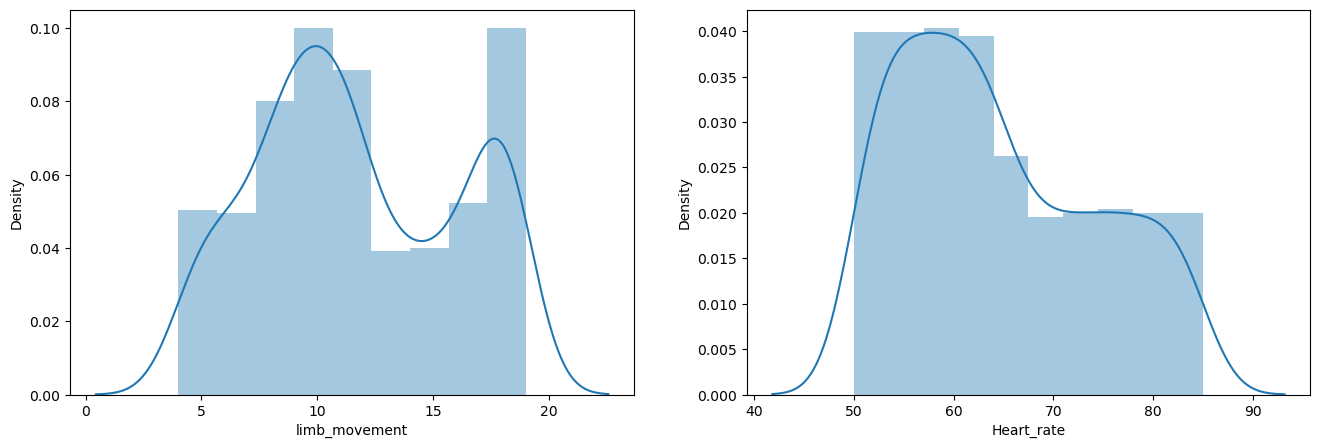

In [94]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['limb_movement'])
plt.subplot(1,2,2)
sns.distplot(df['Heart_rate'])


plt.show()

In [95]:
print("Highest allowed",df['limb_movement'].mean() + 3*df['limb_movement'].std()) ##applying IQR in limb movement
print("Lowest allowed",df['limb_movement'].mean() - 3*df['limb_movement'].std())

Highest allowed 24.59888744416732
Lowest allowed -1.1988874441673225


In [96]:
print("Highest allowed",df['Heart_rate'].mean() + 3*df['Heart_rate'].std()) ##applying IQR in Heart_rate
print("Lowest allowed",df['Heart_rate'].mean() - 3*df['Heart_rate'].std())

Highest allowed 94.24583109292098
Lowest allowed 34.75416890707902


In [97]:
df[(df['limb_movement'] > 24.59888744416733) | (df['limb_movement'] < -1.1988874441673119)]

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level


In [98]:
df[(df['Heart_rate'] > 94.24583109292098) | (df['Heart_rate'] <  34.75416890707902)]

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level


<Axes: >

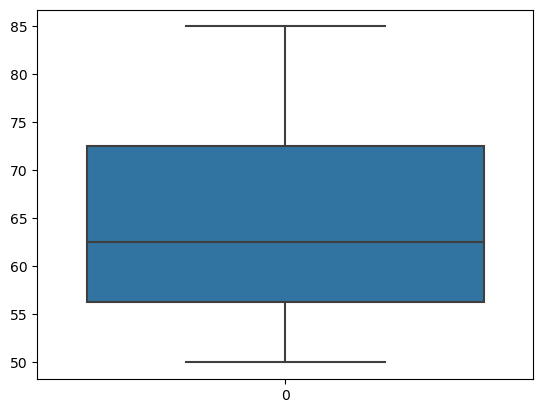

In [99]:
##Detecting outlier using box plot
sns.boxplot(df['Heart_rate'])

<Axes: >

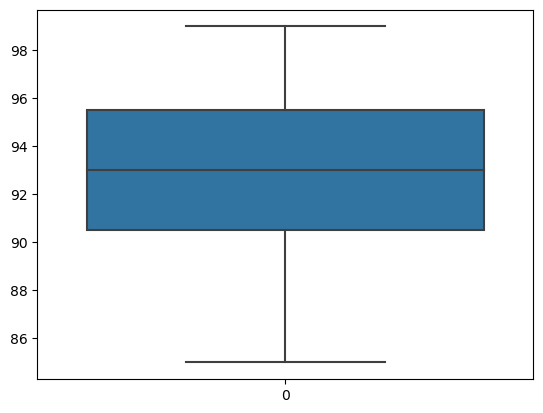

In [100]:
sns.boxplot(df['body_temperature'])

<Axes: >

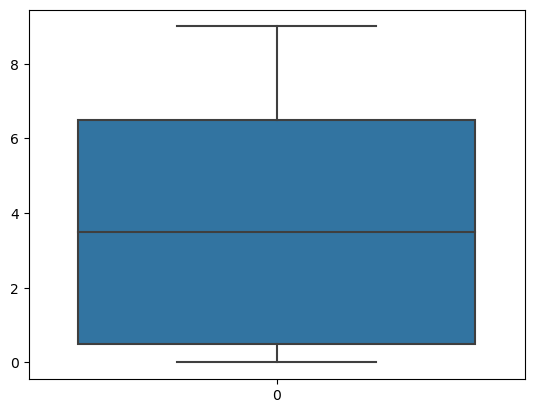

In [101]:
sns.boxplot(df['Sleeping_hours'])

<Axes: >

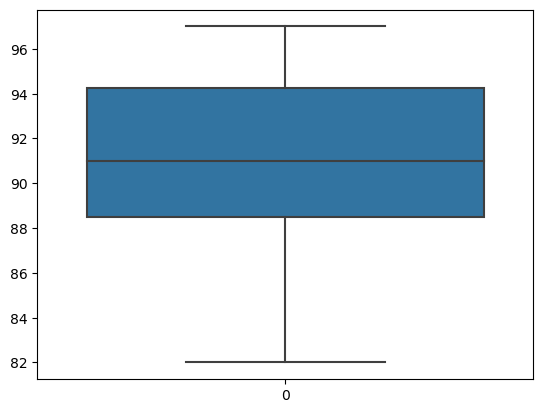

In [102]:
sns.boxplot(df['Blood_oxygen'])

<Axes: >

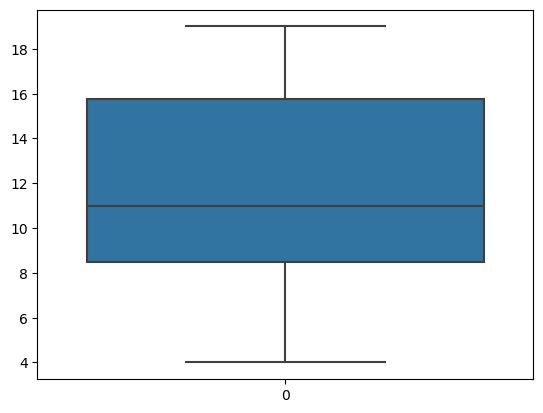

In [103]:
sns.boxplot(df['limb_movement'])

In [104]:
df1 = df.copy()

In [105]:
x=df.iloc[:,0:5]

In [106]:
x

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate
0,91.840,16.600,89.840,1.840,74.20
1,91.552,15.880,89.552,1.552,72.76
2,96.000,10.000,95.000,7.000,60.00
3,90.768,13.920,88.768,0.768,68.84
4,97.872,6.496,96.248,8.248,53.12
...,...,...,...,...,...
625,92.960,10.960,90.960,3.440,62.40
626,98.064,6.752,96.376,8.376,53.44
627,86.880,17.752,84.256,0.000,78.76
628,95.728,9.728,94.592,6.728,59.32


In [107]:
y=df.iloc[:,5]

In [108]:
y

0      3
1      3
2      1
3      3
4      0
      ..
625    2
626    0
627    4
628    1
629    2
Name: Stress_level, Length: 630, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.3)

In [111]:
len(X_train)

441

In [112]:
len(X_test)

189

In [113]:
from sklearn.svm import SVC

In [114]:
model=SVC(kernel= 'rbf')

In [115]:
model.fit(X_train,y_train)

SVC()

In [116]:
model.predict(X_test)

array([1, 1, 0, 1, 3, 1, 4, 4, 1, 0, 3, 2, 0, 3, 3, 4, 3, 0, 4, 0, 2, 0,
       3, 1, 0, 2, 4, 0, 1, 4, 1, 4, 3, 4, 1, 3, 3, 4, 4, 3, 0, 1, 0, 1,
       0, 1, 4, 3, 1, 0, 0, 2, 0, 2, 1, 2, 1, 1, 4, 3, 2, 0, 1, 4, 2, 4,
       3, 4, 4, 1, 1, 1, 0, 1, 4, 1, 1, 3, 0, 0, 2, 3, 4, 3, 0, 1, 1, 0,
       0, 4, 4, 4, 2, 0, 1, 1, 2, 0, 4, 0, 4, 2, 3, 1, 3, 1, 3, 1, 1, 1,
       0, 0, 0, 1, 2, 1, 2, 2, 3, 0, 0, 4, 3, 4, 3, 2, 1, 3, 2, 1, 4, 4,
       3, 1, 1, 3, 4, 0, 4, 4, 1, 2, 1, 1, 4, 1, 4, 1, 4, 3, 2, 4, 0, 4,
       3, 3, 4, 2, 4, 1, 4, 2, 0, 0, 0, 4, 1, 0, 1, 1, 2, 1, 1, 1, 3, 3,
       0, 4, 3, 3, 2, 0, 2, 1, 3, 3, 4, 4, 2], dtype=int64)

In [117]:
X_test

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate
67,92.048,10.048,90.048,2.072,60.12
134,95.936,9.936,94.904,6.936,59.84
12,98.160,6.880,96.440,8.440,53.60
387,95.424,9.424,94.136,6.424,58.56
236,91.152,14.880,89.152,1.152,70.76
...,...,...,...,...,...
610,91.824,16.560,89.824,1.824,74.12
124,90.480,13.200,88.480,0.480,67.40
623,87.680,18.072,85.216,0.000,80.36
294,87.960,18.184,85.552,0.000,80.92


In [118]:
model.score(X_test,y_test)

0.8888888888888888

In [119]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

                     

In [120]:
X, y = make_classification(n_samples=1000, n_features=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': [ 'rbf'],
    'gamma': [0.1, 1, 10]
}
# Create the SVM classifier
svm = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the data to perform the search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test accuracy: ", accuracy)

Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Test accuracy:  0.97


In [121]:
Y=df['Stress_level']

In [122]:
X=df.drop(['Stress_level'],axis=1)

In [123]:
X.head()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate
0,91.840,16.600,89.840,1.840,74.20
1,91.552,15.880,89.552,1.552,72.76
2,96.000,10.000,95.000,7.000,60.00
3,90.768,13.920,88.768,0.768,68.84
4,97.872,6.496,96.248,8.248,53.12


In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [125]:
X= scaler.transform(X)

In [126]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X,Y)
from sklearn.metrics import accuracy_score
X_train_prediction = lr.predict(X)
training_data_accuracy_LR= accuracy_score(Y, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy_LR)

Accuracy score of training data :  0.9698412698412698


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=10)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define the parameter grid to search over
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create the logistic regression classifier
logistic_regression = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)

# Fit the data to perform the search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test accuracy: ", accuracy)


Best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Test accuracy:  0.9033333333333333


In [128]:
from sklearn.model_selection import train_test_split

In [129]:
 X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3)

In [130]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
classifier = DecisionTreeClassifier(criterion='gini')

In [132]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [133]:
classifier.predict(X_test)

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [134]:
X_test

array([[ 0.2367552 , -1.1732822 , -0.52225563, ..., -1.5214799 ,
        -0.11921937,  0.81236382],
       [-0.2617604 ,  0.12952109,  1.14452588, ...,  1.35202006,
        -0.46267265,  0.94243986],
       [ 1.33807728, -1.30420098,  2.66676421, ...,  0.96850423,
         0.18671417,  0.17015913],
       ...,
       [ 0.25152637, -0.68742434, -1.38911409, ...,  0.07263119,
        -2.10737716,  0.04972464],
       [-0.46663012,  0.57716677, -0.7331692 , ...,  0.26184001,
        -0.05184099,  0.79062698],
       [ 1.45057469,  0.99509695,  3.57655933, ...,  0.57684985,
         1.75098891, -0.6474472 ]])

In [135]:
classifier.score(X_test,y_test)

0.88

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=10)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['auto']
}

# Create the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)

# Fit the data to perform the search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test accuracy: ", accuracy)


Best parameters:  {'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
Test accuracy:  0.8366666666666667


In [137]:
from sklearn.model_selection import train_test_split


In [138]:
 X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3)

In [139]:
from sklearn.preprocessing import  StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
x_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [140]:
from sklearn.naive_bayes import GaussianNB

In [141]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [142]:
base=GaussianNB()

In [143]:
model=[base]

In [144]:
for i in model:
    print(i)
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    print("."*60)
    print(accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

GaussianNB()
............................................................
0.8933333333333333
[[134  13]
 [ 19 134]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       147
           1       0.91      0.88      0.89       153

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [145]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate some example data
X, y = make_classification(n_samples=1000, n_features=10)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define the parameter grid to search over (No hyperparameters for Gaussian Naive Bayes)
param_grid = {}

# Create the Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Create the GridSearchCV object
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5)

# Fit the data to perform the search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test accuracy: ", accuracy)

Best parameters:  {}
Test accuracy:  0.9066666666666666


In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
for i in model:
    print(i)
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    print("."*60)
    print(accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

GaussianNB()
............................................................
0.9066666666666666
[[137  10]
 [ 18 135]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       147
           1       0.93      0.88      0.91       153

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [149]:
# Generate some example data
X, y = make_classification(n_samples=1000, n_features=10)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [ 5],
    'weights': ['uniform'],
    'metric': ['euclidean']
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the data to perform the search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test accuracy: ", accuracy)

Best parameters:  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Test accuracy:  0.8966666666666666
